In [1]:
import numpy as np
import pandas as pd
import sklearn

np.set_printoptions(precision=4)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4g}'.format)
sklearn.set_config(transform_output='pandas')

from datar.all import *
from plotnine import *
from mizani import *

[2023-10-27 09:57:54][datar][WARNING] Builtin name "max" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "re" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "sum" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "slice" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "min" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "any" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "filter" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "all" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "round" has been masked by datar.
[2023-10-27 09:57:54][datar][WARNING] Builtin name "abs" has been masked by datar.


# Load dataset

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml('house_prices')
X = df.data.convert_dtypes()
y = df.target.convert_dtypes()

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.


In [3]:
from pipda import register_verb
@register_verb
def convert_dtypes(df, *a, **k):
    return df.convert_dtypes(*a, **k)

@register_verb
def describe(df, *a, **k):
    return df.describe(*a, **k)

info_X = (
    X 
    >> mutate(across(everything(), as_categorical))
    >> describe()
    >> t()
    >> mutate(
        missing = len(X) - f.count,
        dtype = X.dtypes
    )
    >> index_to_column(var='name')
    >> relocate(f.name)
    >> arrange(desc(f.unique))
    >> convert_dtypes()
)
info_X

,name,count,unique,top,freq,missing,dtype
,<string>,<Int64>,<Int64>,<object>,<Int64>,<Int64>,<object>
0,Id,1460,1460,1,1,0,Int64
4,LotArea,1460,1073,7200,25,0,Int64
46,GrLivArea,1460,861,864,22,0,Int64
37,BsmtUnfSF,1460,780,0,118,0,Int64
43,1stFlrSF,1460,753,864,25,0,Int64
38,TotalBsmtSF,1460,721,0,37,0,Int64
34,BsmtFinSF1,1460,637,0,467,0,Int64
62,GarageArea,1460,441,0,81,0,Int64
44,2ndFlrSF,1460,417,0,829,0,Int64


# Define type of features

In [4]:
cat_features = unique([
    'MSSubClass',
    'MoSold',
    'OverallQual',
    'OverallCond',
    *(info_X >> filter(f.dtype == 'string') >> pull(f.name))
])
rest_features = setdiff(info_X.name, cat_features)
X = X >> mutate(across(cat_features, as_factor))
from pprint import pformat

print(f'''
{cat_features=}
{rest_features=}
''')


cat_features=array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foundation',
       'SaleCondition', 'BsmtFinType1', 'MSZoning', 'LotConfig',
       'GarageCond', 'GarageQual', 'BldgType', 'FireplaceQu', 'ExterCond',
       'HeatingQC', 'Electrical', 'ExterQual', 'BsmtCond', 'BsmtQual',
       'MiscFeature', 'Fence', 'LotShape', 'LandContour', 'KitchenQual',
       'MasVnrType', 'BsmtExposure', 'PavedDrive', 'LandSlope',
       'GarageFinish', 'PoolQC', 'Utilities', 'Alley', 'CentralAir',
       'Street'], dtype=object)
rest_features=array(['Id', 'LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF',
       'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', '2ndFlrSF',
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'Garage

# Model

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [6]:
models = []

In [7]:
from sklearn.linear_model import LinearRegression

pre_lin = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False), cat_features),
    ('num', SimpleImputer(strategy='most_frequent', missing_values=pd.NA), rest_features)
], remainder='passthrough', verbose_feature_names_out=False)

models.append(Pipeline([
    ('pre', pre_lin),
    ('est', LinearRegression())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 477 ms, sys: 223 ms, total: 700 ms
Wall time: 205 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foun...
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est', LinearRegression())])

In [8]:
from sklearn.linear_model import Lasso

models.append(Pipeline([
    ('pre', pre_lin),
    ('est', Lasso())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 140 ms, sys: 90.8 ms, total: 230 ms
Wall time: 153 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foun...
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est', Lasso())])

In [9]:
from sklearn.linear_model import LassoCV

models.append(Pipeline([
    ('pre', pre_lin),
    ('est', LassoCV())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 1.56 s, sys: 2.29 s, total: 3.85 s
Wall time: 620 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foun...
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est', LassoCV())])

In [10]:
from sklearn.linear_model import Ridge

models.append(Pipeline([
    ('pre', pre_lin),
    ('est', Ridge())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 193 ms, sys: 11.5 ms, total: 205 ms
Wall time: 136 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foun...
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est', Ridge())])

In [11]:
from sklearn.linear_model import RidgeCV

models.append(Pipeline([
    ('pre', pre_lin),
    ('est', RidgeCV())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 1.65 s, sys: 2.68 s, total: 4.33 s
Wall time: 655 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foun...
       'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF2',
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est', RidgeCV())])

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor

models.append(Pipeline([
    ('pre', ColumnTransformer([
        ('cat', OrdinalEncoder(), cat_features)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('est', HistGradientBoostingRegressor())
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 2.77 s, sys: 37.5 ms, total: 2.81 s
Wall time: 773 ms


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle', 'BsmtFinType2', 'Foundation',
       'SaleCondi...
       'GarageCond', 'GarageQual', 'BldgType', 'FireplaceQu', 'ExterCond',
       'HeatingQC', 'Electrical', 'ExterQual', 'BsmtCond', 'BsmtQual',
       'MiscFeature', 'Fence', 'LotShape', 'LandContour', 'KitchenQual',
       'MasVnrType', 'BsmtExposure', 'PavedDrive', 'LandSlope',
       'GarageFinish', 'PoolQC', 'Utilities', 'Alley', 'CentralAir',
       'Street'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('est', HistGradientBoostingRegressor())])

In [13]:
from catboost import CatBoostRegressor

models.append(Pipeline([
    ('pre', ColumnTransformer([
        ('cat', SimpleImputer(strategy='constant', missing_values=pd.NA, fill_value=None), cat_features),
        ('num', SimpleImputer(strategy='most_frequent', missing_values=pd.NA), rest_features)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('est', CatBoostRegressor(verbose=False, n_estimators=100, cat_features=cat_features))
]))

%time models[-1].fit(X, np.log(y))

CPU times: user 3.32 s, sys: 1.05 s, total: 4.37 s
Wall time: 1.12 s


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='constant'),
                                                  array(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond',
       'Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'Condition1', 'HouseStyle', 'Condition2', 'RoofMatl', 'Functional',
       'GarageType', 'Heating', 'RoofStyle',...
       'EnclosedPorch', 'YearBuilt', 'LotFrontage', 'GarageYrBlt',
       'ScreenPorch', 'YearRemodAdd', 'LowQualFinSF', 'MiscVal',
       '3SsnPorch', 'TotRmsAbvGrd', 'PoolArea', 'BedroomAbvGr',
       'GarageCars', 'YrSold', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'Fireplaces', 'HalfBath', 'BsmtHalfBath'], dtype='<U13'))],
                                   verbose_feature_names_out=False)),
                ('est',
                 <catboost.core.CatBoostRegressor object at 0x7f6ea2a2e230>)])

# Cross-validate

In [14]:
from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

def do_cv(pipe:Pipeline):
    pre = pipe['pre']
    est = pipe['est']
    cv = cross_validate(est, pre.fit_transform(X), np.log(y),
                        scoring=make_scorer(mean_squared_error), cv=10)
    return pd.DataFrame(cv) >> mutate(model = type(est).__name__)

In [15]:
%%time
cvs = bind_rows(*map(do_cv, models))

CPU times: user 1min 31s, sys: 1min, total: 2min 31s
Wall time: 27.3 s


/opt/conda/lib/python3.10/site-packages/pipda/utils.py:163: UserWarning: Failed to fetch the node calling the function, please call the verbs regularly instead of `data >> verb(...)`.


In [16]:
model_names = [ type(m['est']).__name__ for m in models ]
cvs = (
    cvs
    >> mutate(model = fct_relevel(f.model, model_names))
)

In [17]:
(
    cvs
    >> group_by(f.model)
    >> summarise(
        across(everything(), dict(mean=mean)),
        across(f.test_score, dict(median=median))
    )
    >> relocate(f.model, starts_with('test_score'))
)

,model,test_score_mean,test_score_median,fit_time_mean,score_time_mean
,<category>,<float64>,<float64>,<float64>,<float64>
0,LinearRegression,3.87e+07,0.03056,0.1904,0.009061
1,Lasso,0.04059,0.0301,0.02738,0.008563
2,LassoCV,0.04079,0.03001,0.6,0.009277
3,Ridge,0.02135,0.01611,0.02049,0.008614
4,RidgeCV,0.01993,0.01565,0.1177,0.008446
5,HistGradientBoostingRegressor,0.01777,0.01726,0.6861,0.009323
6,CatBoostRegressor,0.01703,0.0159,0.9275,0.00921


/opt/conda/lib/python3.10/site-packages/pipda/utils.py:163: UserWarning: Failed to fetch the node calling the function, please call the verbs regularly instead of `data >> verb(...)`.


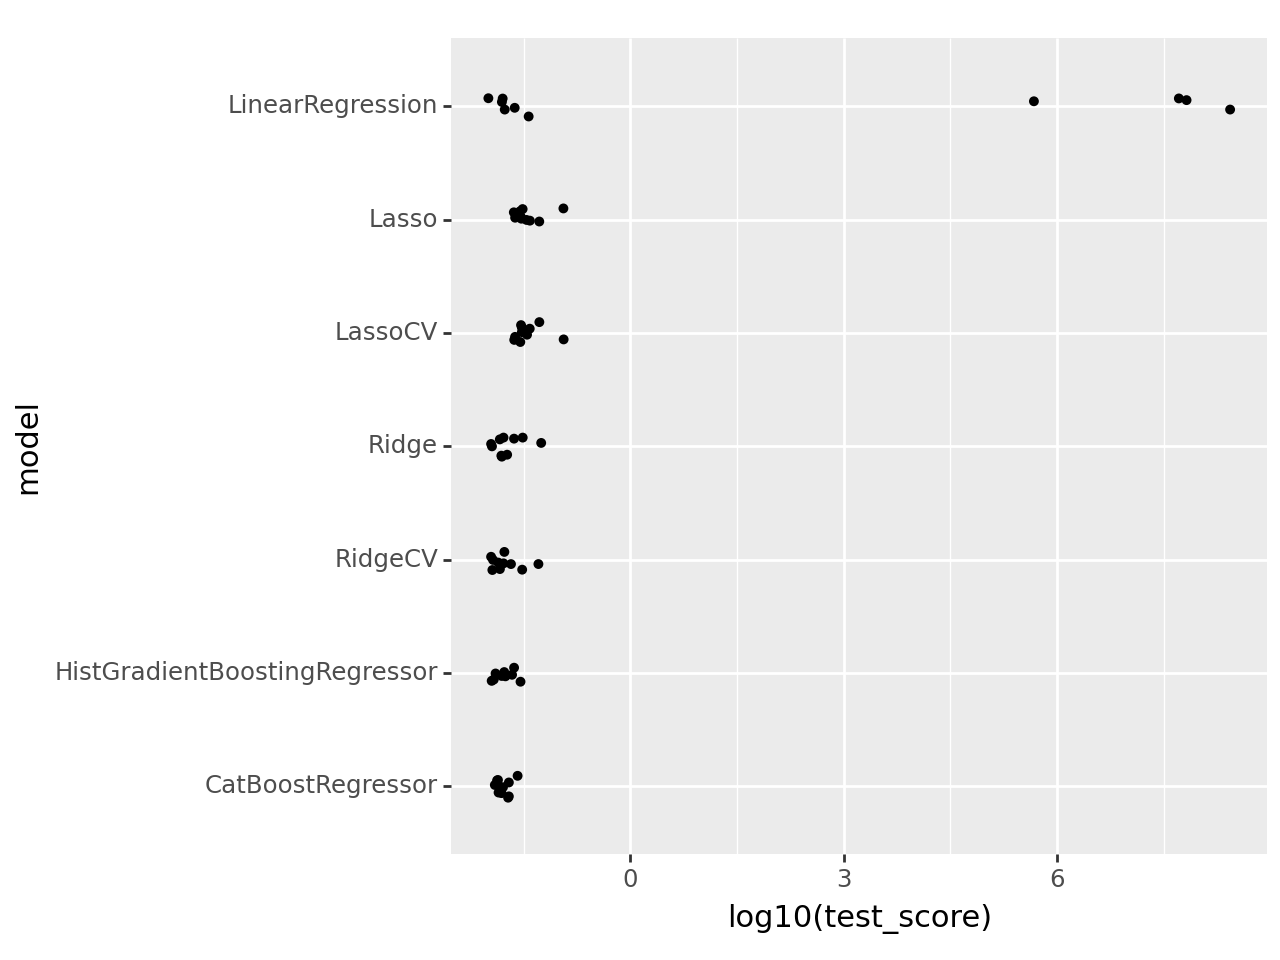

<Figure Size: (640 x 480)>

In [18]:
(cvs
 >> ggplot()
 + geom_jitter(aes('model', 'log10(test_score)'), width=.1, size=1)
 + coord_flip()
 + scale_x_discrete(limits=rev)
)

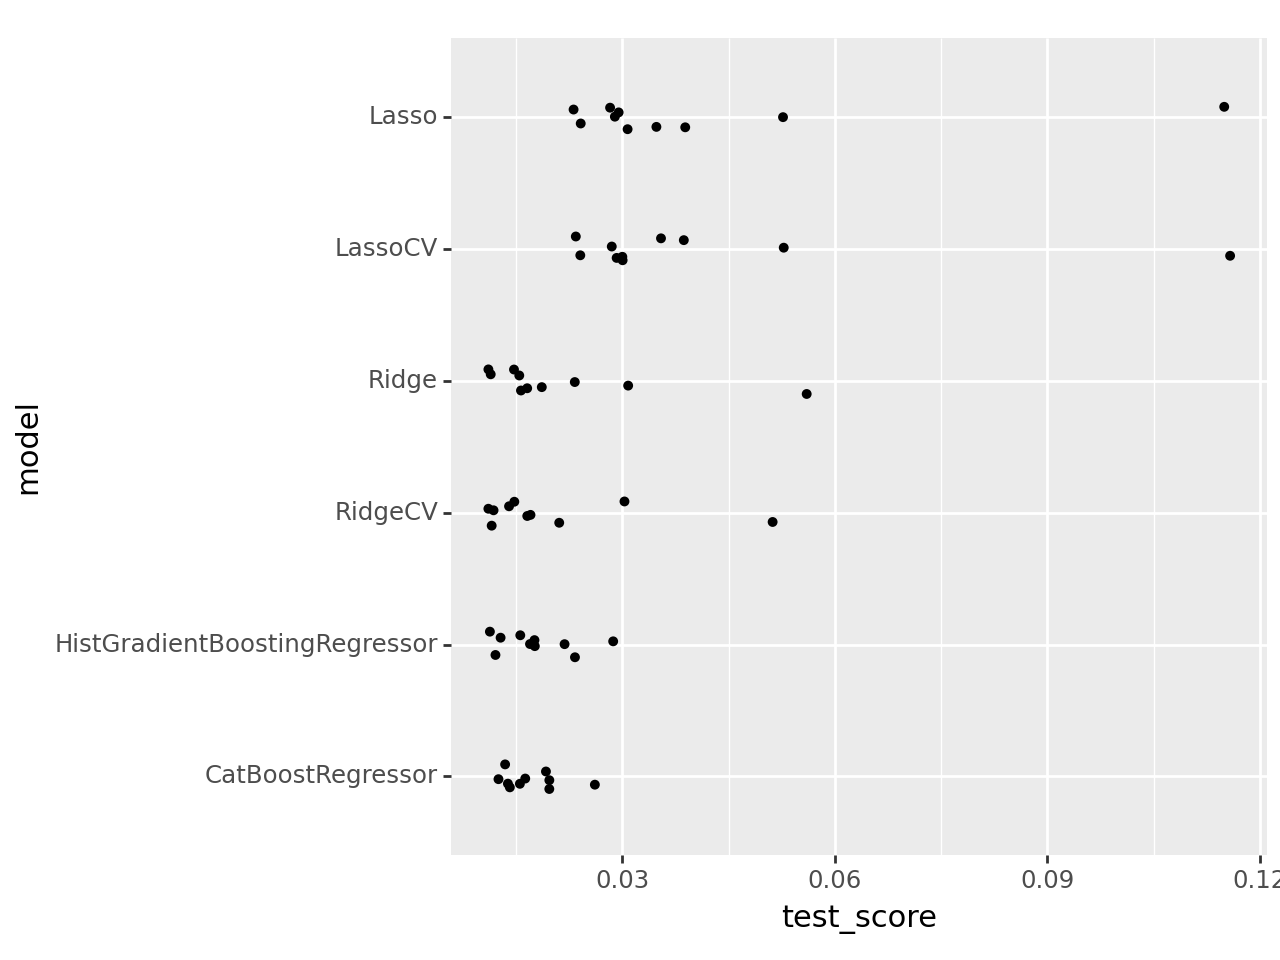

<Figure Size: (640 x 480)>

In [19]:
(cvs
 >> filter(f.model != 'LinearRegression')
 >> ggplot()
 + geom_jitter(aes('model', 'test_score'), width=.1, size=1)
 + coord_flip()
 + scale_x_discrete(limits = rev)
)